In [38]:
import pandas as pd

df = pd.read_csv("loan_dataset_20000.csv")
df.head()


,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
0,59,Male,Married,Master's,24240.19,2020.02,Employed,0.074,743,17173.72,...,36,581.88,B5,7,40833.47,24302.07,1,0,1,1
1,72,Female,Married,Bachelor's,20172.98,1681.08,Employed,0.219,531,22663.89,...,60,573.17,F1,5,27968.01,10803.01,1,0,3,1
2,49,Female,Single,High School,26181.80,2181.82,Employed,0.234,779,3631.36,...,60,76.32,B4,2,15502.25,4505.44,0,0,0,1
3,35,Female,Single,High School,11873.84,989.49,Employed,0.264,809,14939.23,...,36,468.07,A5,7,18157.79,5525.63,4,0,5,1
4,63,Other,Single,Other,25326.44,2110.54,Employed,0.260,663,16551.71,...,60,395.50,D5,1,17467.56,3593.91,2,0,2,1


**Handle Missing & Inconsistent Values**

In [39]:
df.isnull().sum()


,0
age,0
gender,0
marital_status,0
education_level,0
annual_income,0
monthly_income,0
employment_status,0
debt_to_income_ratio,0
credit_score,0
loan_amount,0


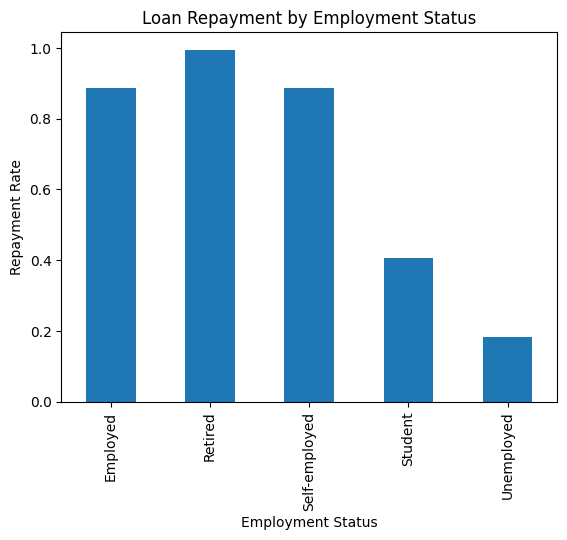

In [40]:
import matplotlib.pyplot as plt

repayment_by_job = df.groupby('employment_status')['loan_paid_back'].mean()

plt.figure()
repayment_by_job.plot(kind='bar')
plt.xlabel("Employment Status")
plt.ylabel("Repayment Rate")
plt.title("Loan Repayment by Employment Status")
plt.show()


**Use Label Encoding**

In [41]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
0,59,1,1,2,24240.19,2020.02,0,0.074,743,17173.72,...,36,581.88,9,7,40833.47,24302.07,1,0,1,1
1,72,0,1,0,20172.98,1681.08,0,0.219,531,22663.89,...,60,573.17,25,5,27968.01,10803.01,1,0,3,1
2,49,0,2,1,26181.80,2181.82,0,0.234,779,3631.36,...,60,76.32,8,2,15502.25,4505.44,0,0,0,1
3,35,0,2,1,11873.84,989.49,0,0.264,809,14939.23,...,36,468.07,4,7,18157.79,5525.63,4,0,5,1
4,63,2,2,3,25326.44,2110.54,0,0.260,663,16551.71,...,60,395.50,19,1,17467.56,3593.91,2,0,2,1


**Scale Numerical Featurest**

In [43]:
from sklearn.preprocessing import StandardScaler

num_cols = df.columns.drop('loan_paid_back')  # all features except target
# now df[num_cols] should be all numeric

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
0,0.693223,0.887726,-0.654489,0.845331,-0.673557,-0.673556,-0.647718,-0.980607,0.915364,0.237580,...,-0.656135,0.459749,-0.840074,0.885820,-0.241078,-0.001404,-0.671330,-0.216768,-0.912836,1
1,1.514503,-0.960933,-0.654489,-0.944392,-0.815431,-0.815431,-0.647718,0.399600,-2.129002,0.875587,...,1.524077,0.428032,1.746510,-0.005257,-0.637883,-0.606382,-0.671330,-0.216768,0.313147,1
2,0.061470,-0.960933,0.843712,-0.049531,-0.605830,-0.605828,-0.647718,0.542380,1.432332,-1.336163,...,1.524077,-1.381226,-1.001735,-1.341874,-1.022361,-0.888616,-1.349339,-0.216768,-1.525828,1
3,-0.822985,-0.960933,0.843712,-0.049531,-1.104924,-1.104922,-0.647718,0.827940,1.863138,-0.022088,...,-0.656135,0.045315,-1.648381,0.885820,-0.940457,-0.842895,1.362695,-0.216768,1.539130,1
4,0.945925,2.736386,0.843712,1.740193,-0.635666,-0.635665,-0.647718,0.789866,-0.233453,0.165297,...,1.524077,-0.218946,0.776541,-1.787413,-0.961746,-0.929468,0.006678,-0.216768,-0.299845,1


**Split into Training (80%) and Testing (20%)**

In [44]:
X = df[num_cols].values
y = df['loan_paid_back'].values

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,     # 20% test data
    random_state=42,    # for reproducibility
    shuffle=True
)


In [46]:
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 16000
Testing samples: 4000


In [49]:
# If you already have numeric features stored in num_cols
test_df = pd.DataFrame(X_test, columns=num_cols)  # X_test is numpy array
test_df['loan_paid_back'] = y_test  # y_test is already numpy array
test_df.to_csv("test_set.csv", index=False)



**Importing necessary libraries**

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Histogram of Credit Score Distribution**

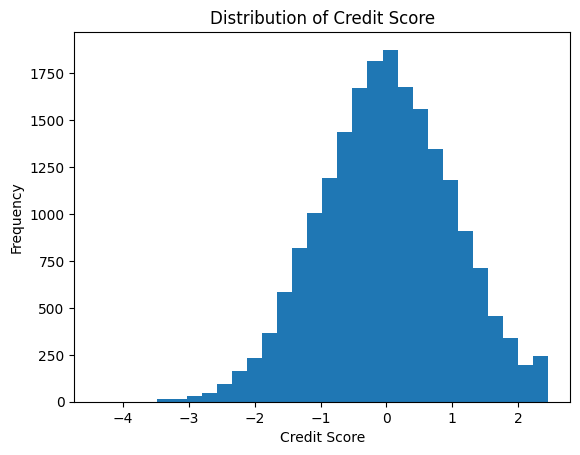

In [51]:
plt.figure()
plt.hist(df['credit_score'], bins=30)
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.title("Distribution of Credit Score")
plt.show()


**Histogram of annual income **

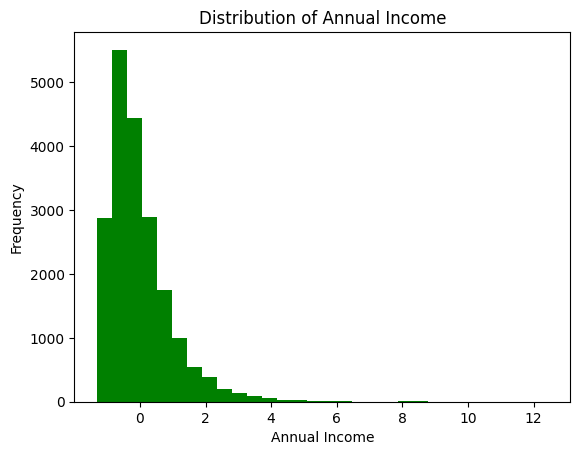

In [52]:
plt.figure()
plt.hist(df['annual_income'], bins=30, color='green')
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Income")
plt.show()


**Bar Chart of Loan Repayment by Employment Status**

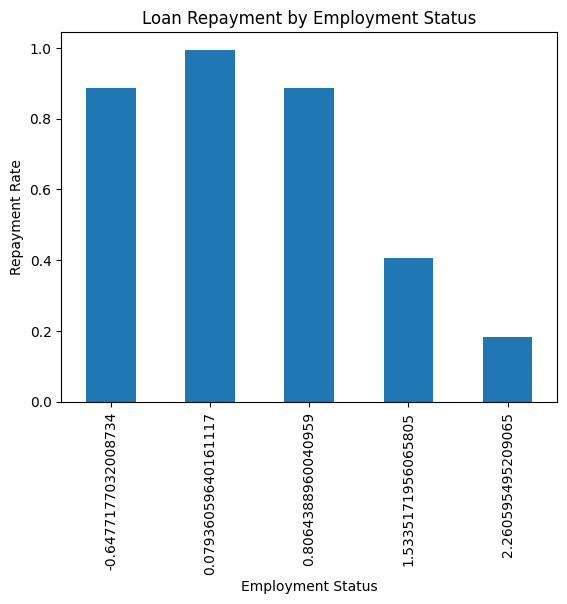

In [53]:
repayment_by_job = df.groupby('employment_status')['loan_paid_back'].mean()

plt.figure()
repayment_by_job.plot(kind='bar')
plt.xlabel("Employment Status")
plt.ylabel("Repayment Rate")
plt.title("Loan Repayment by Employment Status")
plt.show()

**Scatter Plot of Income vs Loan Amount**

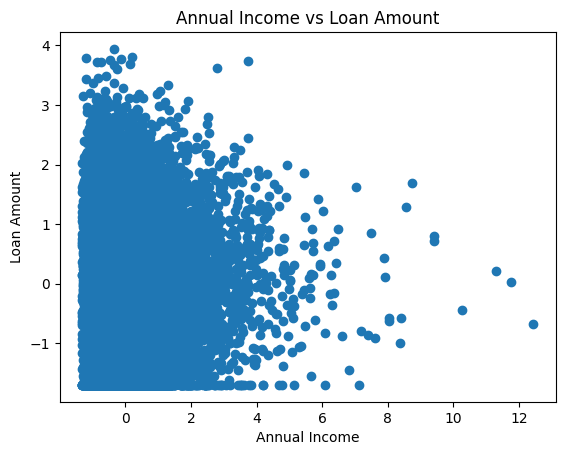

In [54]:
plt.figure()
plt.scatter(df['annual_income'], df['loan_amount'])
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.title("Annual Income vs Loan Amount")
plt.show()


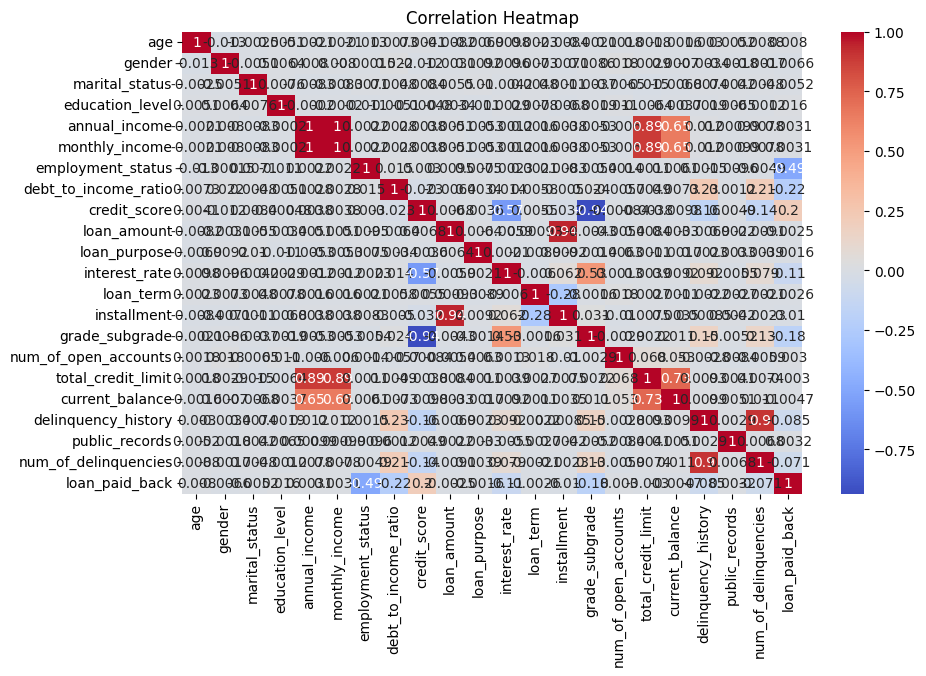

In [55]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [56]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

K-Nearest Neighbors (KNN) Implementation

In [57]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    # "train" simply stores the training data
    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # predict method
    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
            k_indices = distances.argsort()[:self.k]
            k_labels = self.y_train[k_indices]
            most_common = Counter(k_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)

In [61]:
# ===============================
# 3. TUNE k AND EVALUATE
# ===============================
k_values = [1, 3, 5, 7, 9]
best_k = 0
best_f1 = 0  # track best using F1-score
best_metrics = {}

for k in k_values:
    knn_model = KNN(k=k)
    knn_model.train(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nK={k}")
    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # update best
    if f1 > best_f1:
        best_f1 = f1
        best_k = k
        best_metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1, 'Confusion Matrix': cm}

print(f"\nBest k: {best_k} with metrics:")
print(best_metrics)

# ===============================
# 4. FINAL MODEL WITH BEST k
# ===============================
final_knn = KNN(k=best_k)
final_knn.train(X_train, y_train)
y_pred_final = final_knn.predict(X_test)


K=1
Confusion Matrix:
 [[ 376  442]
 [ 360 2822]]
Accuracy: 0.7995
Precision: 0.8646
Recall: 0.8869
F1-Score: 0.8756

K=3
Confusion Matrix:
 [[ 339  479]
 [ 155 3027]]
Accuracy: 0.8415
Precision: 0.8634
Recall: 0.9513
F1-Score: 0.9052

K=5
Confusion Matrix:
 [[ 344  474]
 [  94 3088]]
Accuracy: 0.8580
Precision: 0.8669
Recall: 0.9705
F1-Score: 0.9158

K=7
Confusion Matrix:
 [[ 328  490]
 [  70 3112]]
Accuracy: 0.8600
Precision: 0.8640
Recall: 0.9780
F1-Score: 0.9175

K=9
Confusion Matrix:
 [[ 321  497]
 [  46 3136]]
Accuracy: 0.8642
Precision: 0.8632
Recall: 0.9855
F1-Score: 0.9203

Best k: 9 with metrics:
{'Accuracy': 0.86425, 'Precision': 0.8631984585741811, 'Recall': 0.9855436832181018, 'F1-Score': 0.9203228173147469, 'Confusion Matrix': array([[ 321,  497],
       [  46, 3136]])}


Logistic Regression

In [62]:
import numpy as np
import matplotlib.pyplot as plt


In [86]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for _ in range(self.epochs):
            z = np.dot(X, self.w) + self.b
            y_hat = self.sigmoid(z)

            dw = (1/m) * np.dot(X.T, (y_hat - y))
            db = (1/m) * np.sum(y_hat - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        return self.sigmoid(z)

    def predict(self, X, threshold=0.5):
        probs = self.predict_proba(X)
        return (probs >= threshold).astype(int)



In [88]:
# Create model object
model = LogisticRegressionScratch(lr=0.01, epochs=1000)

# Train on training data ONLY
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)


# Now you can access coefficients
print("Weights:", model.w)
print("Bias:", model.b)


Weights: [ 2.12933404e-02 -8.37654069e-03 -3.56143186e-03  2.01447825e-02
  1.07251572e-02  1.07252084e-02 -8.42047174e-01 -3.82904368e-01
  2.29964527e-01  9.12723884e-04  1.07042712e-02 -4.15604156e-02
  1.69748860e-03 -5.05890449e-03 -1.75606471e-01  1.13080513e-02
 -8.27787217e-03 -2.68827436e-03 -4.65593528e-02  2.50411452e-05
 -1.13436258e-02]
Bias: 1.2826827600166506


In [89]:
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, tn, fp, fn


In [90]:
def accuracy(tp, tn, fp, fn):
    return (tp + tn) / (tp + tn + fp + fn)


In [91]:
def precision(tp, fp):
    return tp / (tp + fp) if (tp + fp) != 0 else 0


In [92]:
def recall(tp, fn):
    return tp / (tp + fn) if (tp + fn) != 0 else 0


In [93]:
def f1_score(p, r):
    return 2 * p * r / (p + r) if (p + r) != 0 else 0


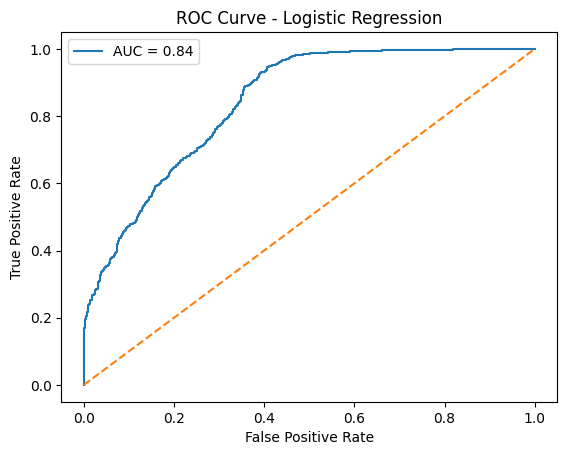

In [94]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Confusion Matrix:
 [[ 446  372]
 [  90 3092]]
Accuracy: 0.8845
Precision: 0.8926096997690531
Recall: 0.9717159019484601
F1 Score: 0.9304845019560638


K-means clustering

In [96]:
import numpy as np

class KMeansScratch:
    def __init__(self, k=3, epochs=100):
        self.k = k
        self.epochs = epochs
        self.centroids = None

    def fit(self, X):
        # Randomly choose k points as centroids
        random_idx = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[random_idx]

        for _ in range(self.epochs):
            # Assign clusters
            clusters = self._assign_clusters(X)

            # Update centroids
            new_centroids = []
            for i in range(self.k):
                cluster_points = X[clusters == i]
                if len(cluster_points) > 0:
                    new_centroids.append(cluster_points.mean(axis=0))
                else:
                    new_centroids.append(self.centroids[i])

            new_centroids = np.array(new_centroids)

            # Stop if no change
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
        return np.argmin(distances, axis=1)

    def predict(self, X):
        return self._assign_clusters(X)


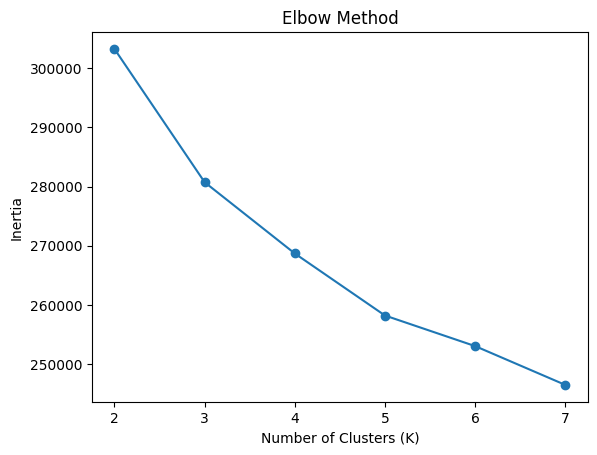

In [97]:
import matplotlib.pyplot as plt

def inertia(X, model):
    clusters = model.predict(X)
    total = 0
    for i in range(model.k):
        points = X[clusters == i]
        total += np.sum((points - model.centroids[i])**2)
    return total


ks = range(2, 8)
scores = []

for k in ks:
    km = KMeansScratch(k=k)
    km.fit(X_train)
    scores.append(inertia(X_train, km))

plt.plot(ks, scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [117]:
kmeans = KMeansScratch(k=4)
kmeans.fit(X_train)

clusters = kmeans.predict(X_train)


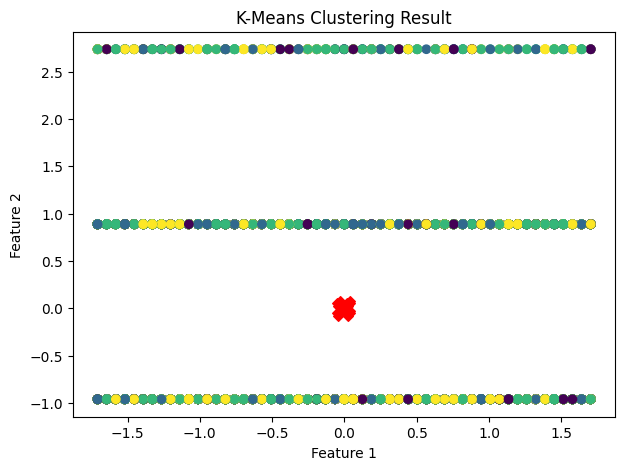

In [118]:
plt.figure(figsize=(7,5))

plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap="viridis")
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], color="red", marker="X", s=200)

plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [119]:
from scipy.stats import mode

cluster_labels = {}

for i in range(kmeans.k):
    cluster_points = y_train[clusters == i]
    if len(cluster_points) > 0:
        cluster_labels[i] = mode(cluster_points, keepdims=True).mode[0]

# Predict test clusters
test_clusters = kmeans.predict(X_test)

# Convert clusters → predicted labels
y_pred = np.array([cluster_labels[c] for c in test_clusters])


In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Confusion Matrix:
 [[   0  818]
 [   0 3182]]
Accuracy: 0.7955
Precision: 0.7955
Recall: 1.0
F1 Score: 0.886104149262044
